In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib  import cm

from rw import scan_handler
from process import utils as ut

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

In [2]:
file_path = "/home/matteo/Scrivania/Bauscia/Runs/BAW_3_1.scan"    # path to the .scan file
reader = scan_handler.ScanReader(file_path)  

In [3]:
power = reader.get_parameters('input_power')
f0s = reader.get_parameters('f0')
Qs = reader.get_parameters('Q')
asim = reader.get_parameters('asim')
T = reader.get_parameters('T')

ii = np.argsort(T)
T = T[ii]
Qs = Qs[ii]
f0s = f0s[ii]

erT = np.append((np.ones(6)*1e-4),np.ones(18)*1e-1)

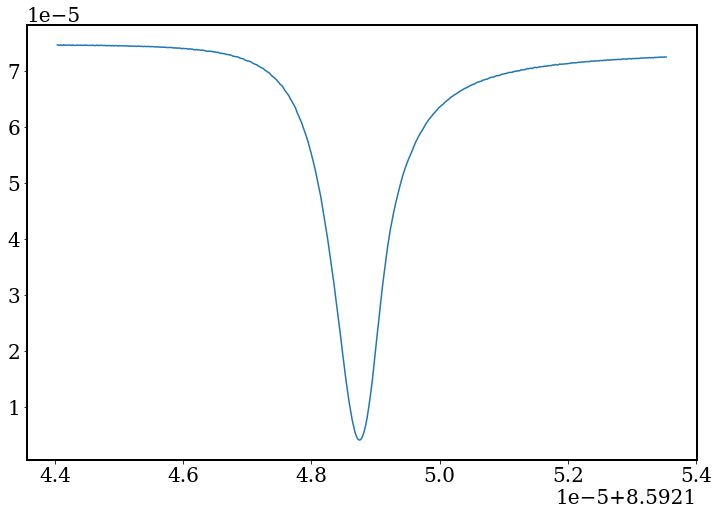

In [4]:
reso = reader.get_resonance(loc=ii[0])
skip = 40
power = reso['power']
power = (10**(power/10))  #mW
freq = reso['freq']*1e-6

power=power[skip:]
freq = freq[skip:]
plt.plot(freq,power)

In [5]:
def fitfunc(x,Pa,Rb,Lb,Cb,Rl):
    Cb = Cb*1e-18
    Y = x*Lb-1./(x*Cb)
    numerator = Pa*((Rb*(Rb+Rl)+Y**2)**2 + (Y*Rb)**2)
    denominator = ( (Rb+Rl)**2+Y**2)**2
    return numerator/denominator


def fitfunc2(x,Pa,P0,f0,Lb,Rl):
    r_P = P0/Pa
    w0 = f0*np.pi*2
    Rb = (-Rl*r_P-Rl*r_P**0.5)/(r_P-1) 
    #Rb = (Rl*r_P**0.5 -Rl*r_P)/(r_P-1)
    Cb = 1./(Lb*w0**2)
    
    Y = x*Lb-1./(x*Cb)
    numerator = Pa*((Rb*(Rb+Rl)+Y**2)**2 + (Y*Rb)**2)
    denominator = ( (Rb+Rl)**2+Y**2)**2
    return numerator/denominator

# Scipy

3.4311261783080224e-17


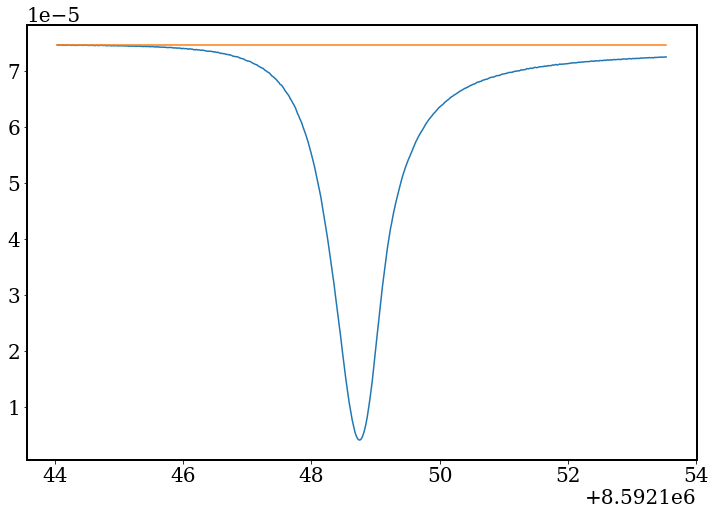

In [86]:
reso = reader.get_resonance(loc=ii[0])
skip = 40
power = reso['power']
power = (10**(power/10))  #mW
freq = reso['freq']

power=power[skip:]
freq = freq[skip:]
plt.plot(freq,power)

LL = 10
f0 = freq[np.argmin(power)]
w0 = f0*np.pi*2
C = 1./(w0**2*LL)
print(C)
yy = fitfunc(freq*np.pi*2,Pa=power[0],Rb=10,Lb=LL,Cb=C,Rl=50)

7.464766678816504e-05
10.0
10.0
3.432670185088261e-17
50.0
yy = fitfunc(freq*np.pi*2,Pa=power[0],Rb=10,Lb=10,Cb=3.4311261e-2,Rl=50)

plt.plot(freq,yy)



7.378551261017284e-05
16.986124952740475
14.999669376320682
22.874678723127595
50.099951245135195
Q =  4.767262e+07


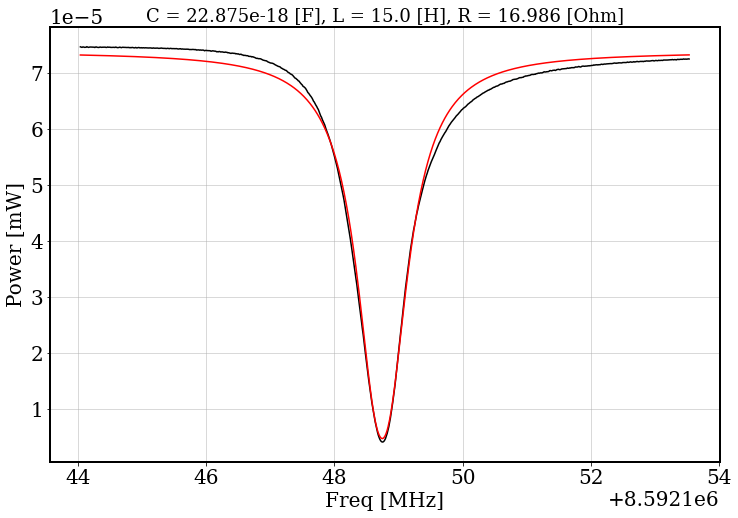

In [87]:
from scipy.optimize import curve_fit 
from scipy.integrate import simps

reso = reader.get_resonance(loc=ii[0])
skip = 40
power = reso['power']
power = (10**(power/10))  #mW
freq = reso['freq']

power=power[skip:]
freq = freq[skip:]

LL = 10
f0 = freq[np.argmin(power)]
w0 = f0*np.pi*2
C = 1./(w0**2*LL)

Pa_guess = power[0]
Rb_guess = 40
Lb_guess = 15
Cb_guess = 1./((freq[np.argmin(power)]*np.pi*2)**2*Lb_guess)
Cb_guess = Cb_guess*1e18
Rl_guess = 50

  
    
initial_guess = np.array([Pa_guess,Rb_guess,Lb_guess,Cb_guess,Rl_guess])
bounds = np.array([[Pa_guess*0.1,Rb_guess*0.1,Lb_guess*0.1,Cb_guess*0.1,49.9],
                       [Pa_guess*10,Rb_guess*10,Lb_guess*10,Cb_guess*10,50.1]])

popt,pcov = curve_fit(fitfunc,xdata=freq*np.pi*2,ydata=power,p0=initial_guess,bounds=bounds)

for p in popt:
    print(p)
Q = (1./popt[1])  *  ((popt[2]/(popt[3]*1e-18))**0.5)
print("Q = ", "{:e}".format(Q))

name = 'C = '+ str(np.round(popt[3],3)) + 'e-18 [F], L = ' + str(np.round(popt[2],3))+ ' [H], R = '+ str(np.round(popt[1],3))+' [Ohm]'
plt.title(name,fontsize=18)
plt.plot(freq,power,color='k')
plt.plot(freq,fitfunc(freq*np.pi*2,*popt),color='r')
plt.xlabel('Freq [MHz]')
plt.ylabel('Power [mW]')
plt.grid(alpha=0.6)
plt.show()

# Minuit

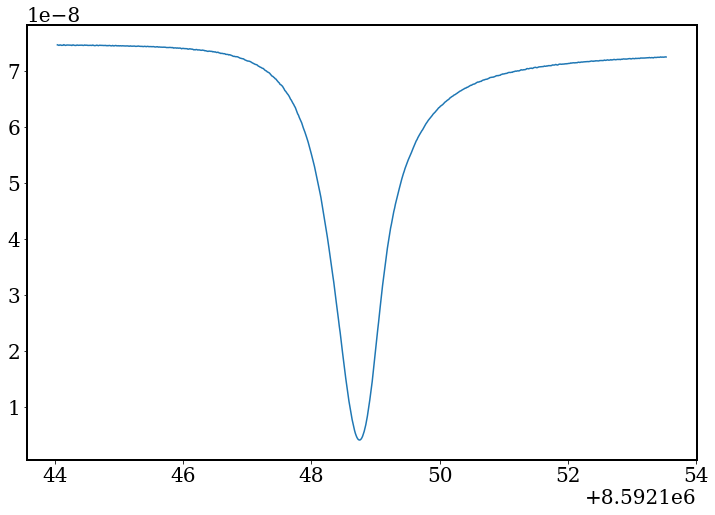

In [6]:
file_path = "/home/matteo/Scrivania/Bauscia/Runs/BAW_3_1.scan"    # path to the .scan file
reader = scan_handler.ScanReader(file_path) 

power = reader.get_parameters('input_power')
f0s = reader.get_parameters('f0')
Qs = reader.get_parameters('Q')
asim = reader.get_parameters('asim')
T = reader.get_parameters('T')

ii = np.argsort(T)
T = T[ii]
Qs = Qs[ii]
f0s = f0s[ii]

reso = reader.get_resonance(loc=ii[0])
skip = 40
power = reso['power']
power = (10**(power/10))/1000  #W
freq = reso['freq']

power=power[skip:]
freq = freq[skip:]
plt.plot(freq,power)

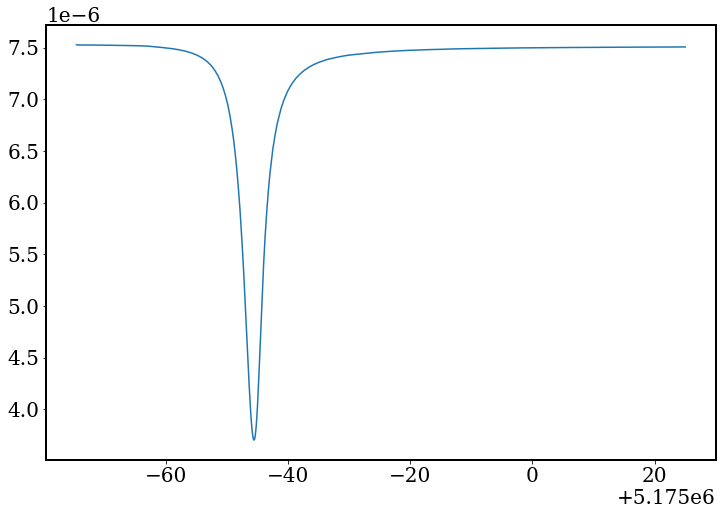

In [48]:
file_path = "/home/matteo/Scrivania/Bauscia/Runs/BAW_1_2.scan"    # path to the .scan file
reader = scan_handler.ScanReader(file_path) 

ii = np.where((fs>=5.174)&(fs<=5.176))[0][0]

reso = reader.get_resonance(loc=ii)
skip = 3
power = reso['power']
power = (10**(power/10))/1000  #W
freq = reso['freq']

power=power[skip:]
freq = freq[skip:]
plt.plot(freq,power)

In [7]:
import iminuit
from iminuit import cost,Minuit

In [8]:
def set_parameter(minuit_obj=None,name=None,p0=None,pmin=None,pmax=None,step=None,fixed=False):
    m1.values[name] = p0
    m1.limits[name]=(pmin,pmax)
    if step is not None:
        m1.errors[name]=step
    m1.fixed[name]=fixed
    return 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.955e+05 (χ²/ndof = 258.2)│              Nfcn = 297              │
│ EDM = 9.53e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Pa   │ 74.101e-9 │ 0.005e-9  │            │            │7.39012e-08│1.49295e-07│       │
│ 1 │ P0   │ 4.922e-9  │ 0.015e-9  │            │            │2.05626e-09│8.22504e-09│       │
│ 2 │ f0   │8.59214874745e6│0.00000000012e6│            │            │8.59214e+06│8.59215e+06│       │
│ 3 │ Lb   │  14.437   │   0.005   │            │            │    1    │   40    │       │
│ 4 │ Rl   │   50.0    │    0.1    │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│    │                Pa                P0                f0                Lb                Rl │
├────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ Pa │          2.51e-23         0.020e-21     19.136213e-18 -12.824001846e-15                 0 │
│ P0 │         0.020e-21          2.33e-22      86.70855e-18   -9.15719962e-15                 0 │
│ f0 │     19.136213e-18      86.70855e-18          1.52e-08         -0.024e-6                 0 │
│ Lb │ -12.824001846e-15   -9.15719962e-15         -0.024e-6          2.07e-05                 0 │
│ Rl │                 0                 0                 0                 0                 0 │
└────┴───────────────────────────────────────────────────────────────────────────────────────────┘

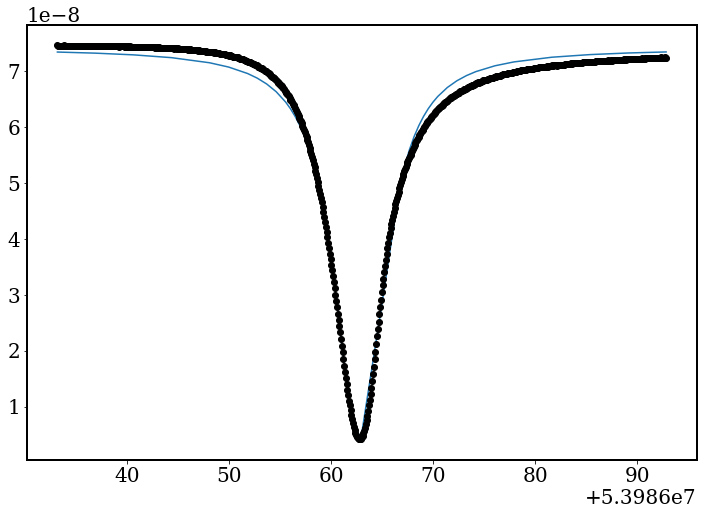

In [10]:
c = cost.LeastSquares(freq*np.pi*2, power, np.ones(len(power))*1e-10, fitfunc2,verbose=0)

m1 = Minuit(c,Pa=0,P0=0,Lb=0,f0=0,Rl=0)

Lb_guess = 10
P0_guess = power[np.argmin(power)]
f0_guess = freq[np.argmin(power)]

set_parameter(m1,'Pa',p0=power[0],pmin=power[0]*0.99,pmax=power[0]*2)
set_parameter(m1,'P0',p0=P0_guess,pmin=P0_guess*0.5,pmax=P0_guess*2)
set_parameter(m1,'Lb',p0=Lb_guess,pmin=1,pmax=40)
set_parameter(m1,'f0',p0=f0_guess,pmin=np.min(freq),pmax=np.max(freq))
set_parameter(m1,'Rl',p0=50,fixed=True)

m1.migrad()


In [11]:
r_P = m1.values['P0']/m1.values['Pa']
w0 = m1.values['f0']*np.pi*2
Rl = m1.values['Rl']
Lb = m1.values['Lb']

Rb = (-Rl*r_P-Rl*r_P**0.5)/(r_P-1) 
Cb = 1./(Lb*w0**2)
print('R = ', Rb, ' [Ohm]')
print('C = ', Cb*1e12, ' [pF]')
print('L = ', Lb, ' [H]')


Q = (1./Rb)  *  ((Lb/(Cb))**0.5)
print("Q = ", "{:e}".format(Q))

R =  17.361358458664466  [Ohm]
C =  2.3765668132879796e-05  [pF]
L =  14.43732260992856  [H]
Q =  4.489362e+07


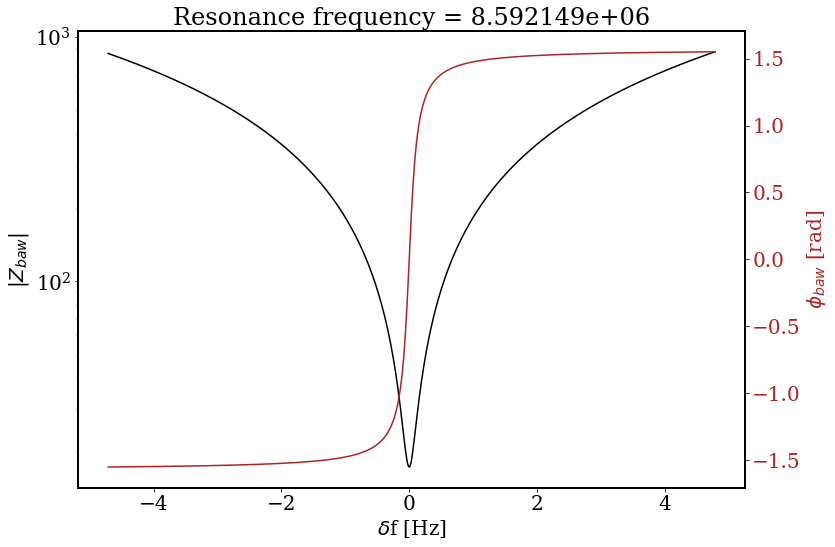

In [12]:
omega = freq*np.pi*2
Zb = Rb + 1j*(omega*Lb -1./(omega*Cb))

fig, ax1 = plt.subplots()
ax1.set_title('Resonance frequency = '+ "{:e}".format(m1.values['f0']))
color = 'k'
ax1.set_xlabel('$\delta$f [Hz]')
ax1.set_ylabel(r'|$Z_{baw}$|', color=color)
ax1.plot(freq-m1.values['f0'], np.abs(Zb), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'firebrick'
ax2.set_ylabel(r'$\phi_{baw}$ [rad]', color=color)  # we already handled the x-label with ax1
ax2.plot(freq-m1.values['f0'], np.angle(Zb), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()